## 문제1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np
from sklearn.decomposition import TruncatedSVD
from scipy.sparse.linalg import svds
import warnings
warnings.filterwarnings("ignore")

#### 첨부파일 'fetal_health.csv'를 불러와서 변수(df)에 할당하세요.

In [2]:
df = pd.read_csv("C:/Users/USER/BITAmin/data/fetal_health.csv")

#### 1-1. 해당 데이터셋에 결측치가 있는지 확인하세요.

In [3]:
# 결측치 확인
df.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

#### 1-2. 피처 데이터셋과 클래스 데이터셋을 분리한 뒤 StandardScaler를 이용하여 스케일링 해주세요.

In [4]:
# X/y 분리
y = df.fetal_health
X = df.drop('fetal_health', axis=1)

In [5]:
# Scaling
X_scaled = StandardScaler().fit_transform(X) # Numpy ndarray
X_scaled_df = pd.DataFrame(data=X_scaled, columns=X.columns) # DataFrame
X_scaled_df.shape

(2126, 21)

#### 1-3. 피처의 개수만큼 주성분을 만들도록 PCA 변환해주세요.

In [6]:
pca = PCA(n_components=21)
pca.fit(X_scaled_df)
pca_df = pca.transform(X_scaled_df)
pca_df.shape

(2126, 21)

#### 1-4. 
#### 1) pca 객체의 explained_variance_ratio_ 속성을 이용하여 개별 pc의 고윳값, 변동성 비율, 누적 변동성 비율을 나타내는 dataframe을 출력하세요.  
#### 2) x축을 n_components, y축을 누적 변동성 비율로 하는 plot을 그려주세요.

In [9]:
# 1) dataframe
cumsum = np.cumsum(pca.explained_variance_ratio_)
res = pd.DataFrame({'고유값': np.round(pca.explained_variance_, 4),
                    '변동성비율': np.round(pca.explained_variance_ratio_, 4)},
                    index = np.array([f'pca{num+1}' for num in range(X_scaled_df.shape[1])]))
res['누적변동성비율'] = res['변동성비율'].cumsum()
res

,고유값,변동성비율,누적변동성비율
pca1,6.0612,0.2885,0.2885
pca2,3.5094,0.1670,0.4555
pca3,1.8252,0.0869,0.5424
pca4,1.4974,0.0713,0.6137
pca5,1.2189,0.0580,0.6717
pca6,1.0207,0.0486,0.7203
pca7,0.9822,0.0468,0.7671
pca8,0.9270,0.0441,0.8112
pca9,0.7628,0.0363,0.8475
pca10,0.6405,0.0305,0.8780


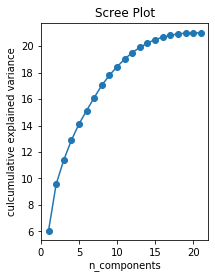

In [10]:
# 2) Scree plot
pc_values = np.arange(pca.n_components_) + 1

plt.figure(figsize=(3,4))
plt.xlabel('n_components')
plt.ylabel('culcumulative explained variance')
plt.plot(pc_values, pca.explained_variance_.cumsum(), 'o-')
plt.title('Scree Plot')
plt.show()

#### 1-5. pc의 개수는 몇 개가 적당하다고 생각하시는지 이유와 함께 설명해주세요.

답 : 8개. 누적변동성비율이 80% 이상이 되는 기점이며 Scree plot에서도 그 즈음 변화가 완만해지는 것을 보아 대략 8개가 적당한 듯하다.

#### 1-6. 위에서 판단한 pc의 개수만큼 스케일링한 데이터를 PCA 변환해주세요.

In [11]:
pca = PCA(n_components=8)
pca.fit(X_scaled_df)
pca_df = pca.transform(X_scaled_df)

#### 1-7. 원본 데이터셋과 pca 변환데이터 셋에 각각 분류를 적용한 후 결과를 출력해주세요.
- 분류기는 RandomForestClassifier를 사용하세요. (random_state=0)
- cross_val_score()를 사용하세요.
- 교차 검증 폴드 수 : 3

In [12]:
rcf = RandomForestClassifier(random_state=0)
scores = cross_val_score(rcf, X_scaled_df, y, scoring='accuracy',cv=3)
scores_pca = cross_val_score(rcf, pca_df, y, scoring='accuracy', cv=3)

print("원본 데이터 교차 검증 평균 정확도: ", np.mean(scores))
print("PCA 변환 데이터 교차 검증 평균 정확도: ", np.mean(scores_pca))

원본 데이터 교차 검증 평균 정확도:  0.8085205283694442
PCA 변환 데이터 교차 검증 평균 정확도:  0.8367890373699463


#### 1-8. 스케일링한 데이터를 컴포넌트 수 2로 설정하여 LDA 변환해주세요.

In [13]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(X_scaled_df, y)
lda_df = lda.transform(X_scaled_df)

#### 1-9. 원본 데이터셋, PCA 변환 데이터셋, LDA 변환 데이터셋에 각각 분류를 적용한 후 결과를 출력해주세요.
- 분류기는 RandomForestClassifier를 사용하세요. (random_state=0)
- cross_val_score()를 사용하세요.
- 교차 검증 폴드 수 : 3

In [14]:
rcf = RandomForestClassifier(random_state=0)
scores = cross_val_score(rcf, X_scaled_df, y, scoring='accuracy',cv=3)
scores_pca = cross_val_score(rcf, pca_df, y, scoring='accuracy', cv=3)
scores_lda = cross_val_score(rcf, lda_df, y, scoring='accuracy', cv=3)

print("원본 데이터 교차 검증 평균 정확도 : ",np.mean(scores))
print('PCA 변환 데이터 교차 검증 평균 정확도 : ',np.mean(scores_pca))
print('LDA 변환 데이터 교차 검증 평균 정확도 : ',np.mean(scores_lda))

원본 데이터 교차 검증 평균 정확도 :  0.8085205283694442
PCA 변환 데이터 교차 검증 평균 정확도 :  0.8367890373699463
LDA 변환 데이터 교차 검증 평균 정확도 :  0.8607757670414552


## 문제2

#### 사용자 개인 영화 히스토리(movie history)를 기반으로 영화를 추천해주는 추천 시스템을 구현해보겠습니다!
cf. https://lsjsj92.tistory.com/570

#### 1) 데이터 불러오기
- 'ratings.csv'와 'movies.csv'를 불러와서 각각 'ratings'와 'movies'로 저장해주세요.
- 사용자별 각 영화당 평점 데이터를 만드려고 합니다. 'ratings'를 pivot table형식으로 바꾸어 'user_movie_ratings'로 저장해주세요. 
  index는 userId, column은 movieId, value는 rating입니다.
- 결측값들은 모두 0으로 변환해주세요

In [15]:
ratings = pd.read_csv("C:/Users/USER/BITAmin/data/ratings.csv")
movies = pd.read_csv("C:/Users/USER/BITAmin/data/movies.csv")

In [16]:
user_movie_ratings = ratings.pivot(
                     index = 'userId',
                     columns = 'movieId',
                     values = 'rating').fillna(0)

#### 2) 데이터 전처리
- 각 사용자의 평균 평점을 'X_mean'으로 저장해주세요.
- 각 데이터에 해당 사용자의 평균 평점을 빼서 'X_scaled'로 저장해주세요.

In [17]:
# pivot table -> numpy matrix 
matrix = user_movie_ratings.as_matrix()

# 각 사용자의 평균 평점
X_mean = np.mean(matrix, axis=1)

# 각 데이터에 해당 사용자의 평균 평점을 뺌 
X_scaled = matrix - X_mean.reshape(-1,1)

#### 3) Truncated SVD
-  Truncated SVD 행렬 분해 기법을 활용하여 U, sigma, Vt 행렬을 반환해주세요.
   (sigma 특이값을 12로 해주세요)
- 각 행렬의 shape을 확인 후, sigma를 0이 포함된 대칭행렬로 변환해주세요.
- 분해된 행렬의 내적을 수행하여 데이터를 다시 복원하고, 데이터프레임으로 만든 뒤 svds_preds로 저장해주세요.
   (전처리 과정에서 뺀 평균을 다시 더하여 복구해야해요)

In [18]:
# Truncated SVD 
U, sigma, Vt = svds(X_scaled, k=12)

In [19]:
# 각 행렬의 shape 확인
print(U.shape)
print(sigma.shape)
print(Vt.shape)

# sigma를 0이 포함된 대칭행렬로 변환
sigma = np.diag(sigma)

(671, 12)
(12,)
(12, 9066)


In [20]:
# 다시 데이터 복원 
svd_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + X_mean.reshape(-1, 1)
svd_preds = pd.DataFrame(svd_predicted_ratings, columns=user_movie_ratings.columns)
svd_preds.head(3)

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
0,-0.079686,0.021779,-0.013837,-0.005870,-0.028877,0.032371,0.000715,-0.004428,-0.005219,0.038195,...,-0.004324,-0.004352,0.010478,-0.004256,-0.003944,-0.005674,0.018157,-0.005575,-0.005297,-0.003766
1,1.428452,1.608841,0.529476,0.168278,0.520809,1.107473,0.529719,0.089376,0.296270,1.970031,...,0.013227,-0.002275,0.020680,-0.005245,-0.007644,-0.021019,0.031243,-0.000957,-0.000753,0.026901
2,0.977246,0.396971,0.000299,0.027444,0.021287,0.141458,-0.057134,0.031633,-0.012538,0.383576,...,0.002761,0.004907,-0.014190,-0.000251,-0.006007,-0.003189,-0.026916,0.014637,0.013287,-0.005741


#### 4) 영화 추천 시스템

- 코드마다 주석을 작성하여 영화 추천 시스템 알고리즘을 이해해보세요.
- 위 함수를 사용하여 612번 user에게 5개의 영화를 추천해주세요.
   (user_history와 recommmendations를 각각 확인해주세요)

In [21]:
def recommend_movies(svds_preds, user_id, movies, ratings, num_recommend = 5):
    
    # index를 맞춰주기위해 user_id에서 1을 뺀다.
    user_row_number = user_id - 1
    
    # user에 따라 svd_preds를 평점이 높은 순으로 정렬한다. 
    sorted_user_predictions = svds_preds.iloc[user_row_number].sort_values(ascending = False)
    
    # ratings 데이터에서 우리가 원하는 user와 일치하는 데이터를 뽑아낸다.
    user_data = ratings[ratings.userId == user_id]
    
    # 위에서 뽑은 데이터를 movies 데이터와 합치고 평점이 높은 순으로 정렬한다. 
    user_history = user_data.merge(movies, on = 'movieId').sort_values(['rating'], ascending = False)
    
    # user가 이미 본 영화는 제외한 데이터를 추출한다. 
    recommendations = movies[~movies['movieId'].isin(user_history['movieId'])]
    
    # user의 평점이 높은 순으로 정렬한 데이터와 아직 안 본 영화 데이터를 합친다. 
    recommendations = recommendations.merge(pd.DataFrame(sorted_user_predictions).reset_index(), on = 'movieId')
    
    # user가 아직 안 본 영화에서 평점이 높은 것을 추천한다. 
    recommendations = recommendations.rename(columns = {user_row_number : 'Predictions'}).sort_values('Predictions', ascending = False)
    recommendations = recommendations[:num_recommend]
    
    return user_history, recommendations

In [22]:
user_history, recommendations = recommend_movies(svd_preds, 612, movies, ratings)

In [23]:
user_history.head()

,userId,movieId,rating,timestamp,title,genres
9,612,1246,5.0,1455638856,Dead Poets Society (1989),Drama
52,612,49530,4.5,1455638474,Blood Diamond (2006),Action|Adventure|Crime|Drama|Thriller|War
37,612,4993,4.5,1455638619,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy
6,612,1097,4.5,1455638867,E.T. the Extra-Terrestrial (1982),Children|Drama|Sci-Fi
58,612,69122,4.5,1455638424,"Hangover, The (2009)",Comedy|Crime


In [24]:
recommendations

,movieId,title,genres,Predictions
4351,5952,"Lord of the Rings: The Two Towers, The (2002)",Adventure|Fantasy,0.970325
3385,4306,Shrek (2001),Adventure|Animation|Children|Comedy|Fantasy|Ro...,0.960726
2348,2959,Fight Club (1999),Action|Crime|Drama|Thriller,0.957244
4976,7153,"Lord of the Rings: The Return of the King, The...",Action|Adventure|Drama|Fantasy,0.949557
3768,4886,"Monsters, Inc. (2001)",Adventure|Animation|Children|Comedy|Fantasy,0.836192
